# Example evaluation

This notebook contains various model evaluation techniques, including:
- __Confusion matrix__
- __Classification report__
- __Cross-validation statistics__
- __Feature importance (impurity-based/permuation-based)__


In [3]:
import pickle

with open('model/classifier.pkl', 'rb') as f:
    clf = pickle.load(f)
    
with open('model/test_data.pkl', 'rb') as f:
    X_test = pickle.load(f)
    y_test = pickle.load(f)
    
with open('model/feature_data.pkl', 'rb') as f:
    fn = pickle.load(f)
    cn = pickle.load(f)
    dl = pickle.load(f)

### Confusion matrix

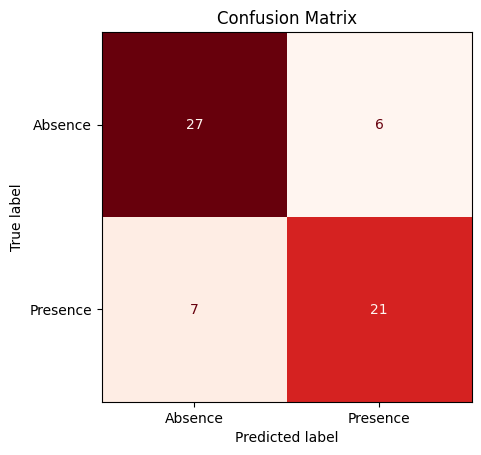

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

sns.reset_defaults()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=dl, cmap='Reds', colorbar=False)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### Classification report

In [5]:
import pandas as pd

from sklearn.metrics import classification_report

y_true = y_test.values.ravel()
y_pred = clf.predict(X_test)
report = classification_report(y_true, y_pred, target_names=dl, zero_division=0.0, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Absence,0.794118,0.818182,0.805970,33.000000
Presence,0.777778,0.750000,0.763636,28.000000
accuracy,0.786885,0.786885,0.786885,0.786885
macro avg,0.785948,0.784091,0.784803,61.000000
weighted avg,0.786617,0.786885,0.786538,61.000000


### Hyperparameter tuning ranks

In [6]:
import pandas as pd

df = pd.read_csv('model/cv_results.csv')
df = df.sort_values('rank_test_score')
columns = [i.removeprefix('param_') for i in df.columns if 'param_' in i]    
columns.append('rank')
df = pd.DataFrame(df, columns=[i for i in df.columns if 'param_' in i or 'rank' in i])
df.columns = columns
df

,n_estimators,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,rank
2,200,2,10,100.0,sqrt,20.0,1
5,200,5,2,50.0,log2,50.0,2
9,200,2,2,20.0,log2,20.0,3
8,500,5,10,50.0,log2,NaN,4
4,50,10,10,50.0,sqrt,50.0,5
3,200,20,1,100.0,log2,100.0,6
7,50,2,5,20.0,log2,100.0,7
1,50,10,2,20.0,NaN,NaN,8
0,50,2,5,NaN,NaN,10.0,9
6,100,2,5,NaN,NaN,NaN,10


### Full hyperparameter tuning report

In [7]:
import pandas as pd

df = pd.read_csv('model/cv_results.csv')
df = df.sort_values('rank_test_score')
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2,0.236246,0.021309,0.035808,0.006615,200,2,10,100.0,sqrt,20.0,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.897788,0.877755,0.828796,0.916667,0.750435,0.854288,0.059614,1
5,5,0.343774,0.046482,0.035212,0.011183,200,5,2,50.0,log2,50.0,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.897183,0.857143,0.851215,0.916667,0.729521,0.850345,0.065173,2
9,9,0.287464,0.043298,0.033066,0.010309,200,2,2,20.0,log2,20.0,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.897788,0.877755,0.828796,0.895969,0.708333,0.841728,0.071196,3
8,8,0.640844,0.042919,0.028527,0.002592,500,5,10,50.0,log2,NaN,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.897788,0.898215,0.805886,0.895969,0.687908,0.837153,0.082603,4
4,4,0.089394,0.023215,0.018208,0.002557,50,10,10,50.0,sqrt,50.0,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.877551,0.837007,0.828796,0.916667,0.708841,0.833772,0.069902,5
3,3,0.283728,0.044713,0.023313,0.010167,200,20,1,100.0,log2,100.0,"{'n_estimators': 200, 'min_samples_split': 20,...",0.897788,0.857143,0.805886,0.895969,0.708841,0.833125,0.070564,6
7,7,0.074380,0.011798,0.020391,0.002907,50,2,5,20.0,log2,100.0,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.897788,0.837007,0.805886,0.895969,0.667246,0.820779,0.084429,7
1,1,0.083516,0.008559,0.019394,0.001115,50,10,2,20.0,NaN,NaN,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.877036,0.793871,0.810754,0.916667,0.667246,0.813115,0.085396,8
0,0,0.079958,0.006024,0.023657,0.007733,50,2,5,NaN,NaN,10.0,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.877036,0.774199,0.805886,0.874339,0.708841,0.808060,0.063476,9
6,6,0.169176,0.040700,0.034745,0.020193,100,2,5,NaN,NaN,NaN,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.856903,0.752645,0.828796,0.895605,0.667246,0.800239,0.081330,10


### Impurity-based feature importance

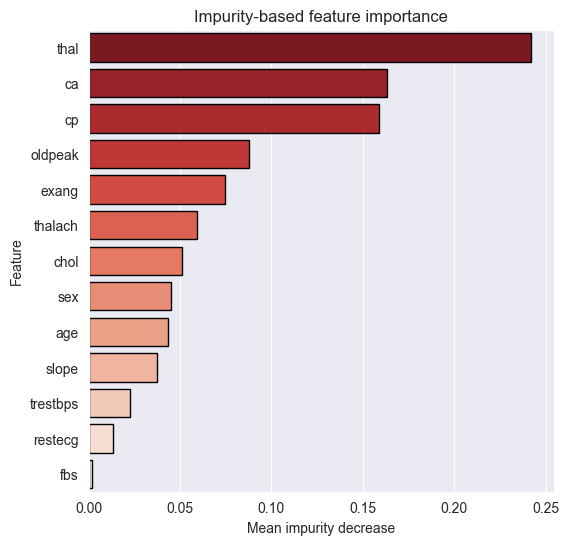

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fi = pd.Series(clf.feature_importances_, index=fn)
fi = fi.sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.reset_defaults()
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
plot = sns.barplot(x=fi.values, y=fi.index, hue=fi.index, palette='Reds_r', color='red')
plot.set_title('Impurity-based feature importance')
plot.set_xlabel('Mean impurity decrease')
plot.set_ylabel('Feature')
plt.show()

### Permutation-based feature importance

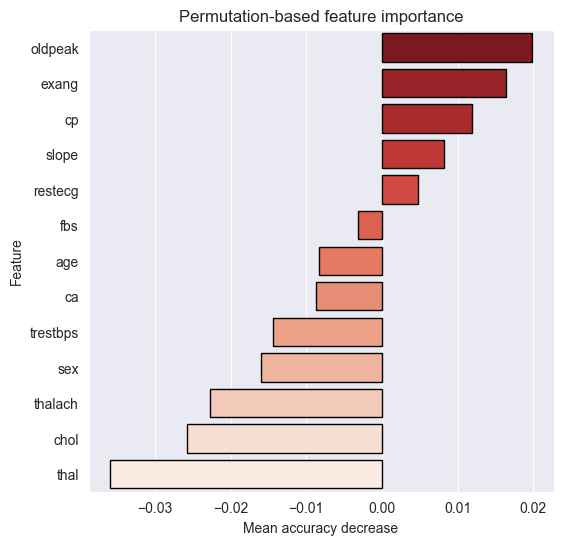

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

pi = permutation_importance(clf, X_test, y_test, n_repeats=10, scoring='f1_weighted')
fi = pd.Series(pi.importances_mean, index=fn)
fi = fi.sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.reset_defaults()
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
plot = sns.barplot(x=fi.values, y=fi.index, hue=fi.index, palette='Reds_r')
plot.set_title('Permutation-based feature importance')
plot.set_xlabel('Mean accuracy decrease')
plot.set_ylabel('Feature')
plt.show()